# Regularization

## Introduction

Let's recap a few important concepts:
Machine Learning (ML) is about building models $h_{\theta}(x)$ with **tunable parameters** (typically an
array of floating point values $\theta_0, \theta_1 ... \theta_n$) that are adjusted automatically so as to improve
the predictive power of the model by **adapting/fitting the tunable parameters to previously seen data ($X_{train}$).**

In machine learning, overfitting occurs when a statistical model describes random error or noise in the training data ($X_{train}$) instead of the underlying relationship between $x$ and $y$. Overfitting generally occurs when a model is excessively complex, such as having too many parameters (large $n$ in $\theta_0, \theta_1 ... \theta_n$) relative to the number of observations (rows in $X$). A model that has overfitted the trainning data will generally have poor predictive performance on out of sample data ($X_{test}$, i.e. data that it has not seen during training). This is because complex models can exaggerate minor random fluctuations (noise) in the trainning data. Paradoxically, such a model performs very well on the training data $X_{train}$ (it is said to overfit the training data in fact), while performing poorly on the test set $X_{test}$ (bad generalization). That is, the performance of the complex model $h_{\theta}(x)$ on $X_{train}$ will be good while the relevant performance on unseen data $X_{test}$ will be bad. A better model might not perform as well in the training data $X_{train}$ but might be able to generalize better and carry out better predictions on out of sample data such as the test data $X_{test}$.

So in general we would like to find the optimal sweet spot between overfitting and underfitting that optimizes the performance of our model on test data, that is where regularization can help.
<img src="images/f.png">

## Ridge and Lasso Regularization

Regularization is a method for "constraining" or "regularizing" (i.e. making smaller) the size of the coefficients $\theta_0, \theta_1 ... \theta_n$, thus "shrinking" them towards zero. This tends to reduce the variance more than it increases bias, creating smoother models that minimize overfitting.

Common regularization techniques for linear models are:

- Ridge regression (aka "$L_2$ regularization"): shrinks coefficients toward zero (but they quite never reach zero)
- Lasso regularization (aka "$L_1$ regularization"): shrinks some coefficients all the way to zero
- ElasticNet regularization: balance between Ridge and Lasso

Lasso regularization is useful if we believe many features are irrelevant, since a feature with a zero coefficient is essentially removed from the model. Thus, it is a useful technique for feature selection.

How does regularization work?

- A tuning hyper parameter lambda $\lambda$ (sometimes called alpha $\alpha$) imposes a penalty on the size of coefficients.
- Instead of minimizing the "loss function" (mean squared error), regularization minimizes the loss functions plus a penalty weighted by $\lambda$.
- A tiny $\lambda$ imposes a minor penalty on the coefficient size, and is almost equivalent to a non-regularized model.
- Increasing $\lambda$ penalizes the coefficients more and shrinks them toward zero.

Remember than in linear regression the cost function $J$ is simply the sum of the differences between what the model predicts $h(x_i)$ for an input data point $x_i$ and the actual value of $y_i$ for $x_i$:

$\Large{J(\theta)=\frac{1}{2m}[\sum_{i=1}^m(h_\theta(x^{(i)})-y^{(i)})^2]}$

Using regularization implies modifying the cost function $J$ by adding a penalty term for each parameter $\theta_n$ weighted by $\lambda$.  The cost function for Ridge regression is:

$\Large{J(\theta)=\frac{1}{2m}[\sum_{i=1}^m(h_\theta(x^{(i)})-y^{(i)})^2+\lambda\sum_{j=1}^n\theta_j^2]}$

Lasso Regression cost function simply does not the square the penalty for each parameter of the model:

$\Large{J(\theta)=\frac{1}{2m}[\sum_{i=1}^m(h_\theta(x^{(i)})-y^{(i)})^2+\lambda\sum_{j=1}^n\theta_j]}$


The core idea behind regularization is that we are going to prefer models that are simpler (they have less or smaller parameters $\theta_n$).

## Hands-on practical with regularization

Let's start with a curve fitting regression problem. We will generate a one dimensional data set with some random noise. We begin with some preliminary imports. 

In [1]:
%matplotlib inline
import numpy as np
import scipy.stats as st
import sklearn.linear_model as lm
import matplotlib.pyplot as plt

Now we're going to define a deterministic target function. Think of this function as some law of nature that underlies reality (or the part of reality emcopassing the phenomena we are studying). Of course this is not realistic, since in real life likely we will not know the underlying generative model or law of nature/society behind the process we are observing (income of a person based on years of education, work experience, etc..., how much should a house cost based on features such as size, rooms, location...). That is, we don't know the target function $f(x)$. In fact, in machine learning we are trying to approximate the target function with our model $h_{\theta}(x)$. We are using such a generative model (target function), just for illustration purposes. Our target function will be $f(x)=e^{3x}$.

In [2]:
f_target = lambda x: np.exp(3 * x)

Next, we generate 200 values along the x axis in the interval [0,2], and the corresponding values of $f(x)$ in order to create a nice plot of $f$.

In [3]:
x_set = np.linspace(0., 2, 200)
y_target = f_target(x_set)

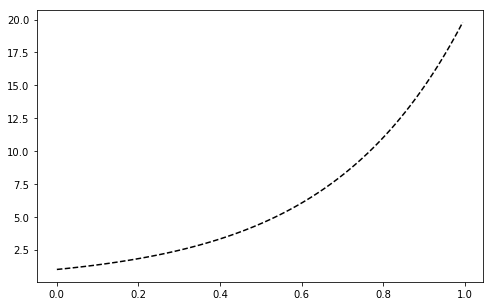

In [4]:
plt.figure(figsize=(8,5))
plt.plot(x_set[:100], y_target[:100], '--k');

So this is $f(x)$, the phenomena that we want to study. Again, in real life you will never know for sure the shape of $f(x)$.

Now, let's generate our data points within the interval [0,1] by sampling from the target function $f(x)$. We add some Gaussian noise to obtain 7 observations with 1 feature ($x$). 

In [5]:
np.random.seed(seed=2)
x = np.array([0.01, .1, .2, .5, .8, .9, .99])
y = f_target(x) + 2*np.random.randn(len(x)) #y will be determined by the law of nature f_target plus some random noise

In [6]:
x,y

(array([0.01, 0.1 , 0.2 , 0.5 , 0.8 , 0.9 , 0.99]),
 array([ 0.19693884,  1.23732515, -2.45027339,  7.76223069,  7.43630521,
        13.19623699, 20.49768243]))

Let's plot what we've got so far:

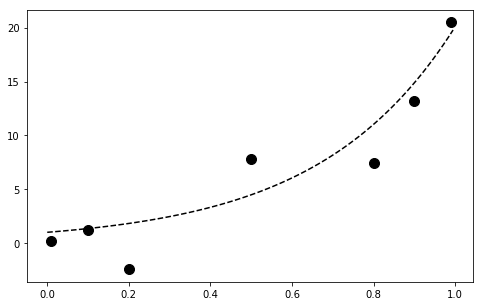

In [7]:
plt.figure(figsize=(8,5))
plt.plot(x_set[:100], y_target[:100], '--k');
plt.plot(x, y, 'ok', ms=10);

The black dots is the data that we would usually see in real life. Again, we would never see the dotted line $f(x)$, but the black dots (our training data) have been sample from the target function $f(x)$, with some artificially added stochastic noise to simulate sensor variability.

All that we have done so far is to create a law, $f_{target}$, of the simulated universe we are working with (similar to how $e=mc^2$ is a law of the universe we inhabit). This law could describe the true relationship between for instance the number of years spent in an educational facility by a person and their income or anything else you can think of. The dashed line is just a visualization of that law in the range [0,1] using the data contained in `x_set` and `y_target`.  The black dots on the other hand, represent some obervations generated according to the law, $f_{target}$ and with some noise superimposed (that is why they do not  match the dashed line perfectly). Noise is an inherited limitation of the universe that we inhabit since no data capturing instrument is 100% percent accurate. It could also be the case that our target values **y** (income of a person for instance) is not only determined by a single feature $x$ (years of education in this example), but rather it is also influenced by IQ, marital status, or something else. Hence, the black dots do not perfectly match the model (dashed line). Once again, in real life you will have no idea of how the dashed line (target function $f_{target}$) looks like, you will only be able to see the data (dots) stored in $X$. The whole task of machine learning is to approximate $f_{target}$ using the data $X$.

Next, we will use linear regression on just the black dots data to try to approximate the hidden Law $f_{target}$.

In [8]:
# We create the model.
lr = lm.LinearRegression()
# We train the model on our training dataset.
lr.fit(x[:, np.newaxis], y);
# Now, we predict points with our trained model.
y_lr = lr.predict(x_set[:, np.newaxis])

We now plot the result of the trained linear model. We obtain a regression line shown in green here.

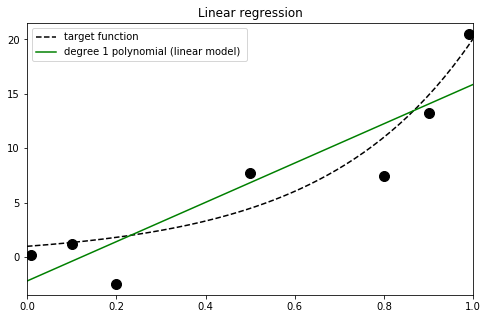

In [9]:
plt.figure(figsize=(8,5))
plt.plot(x_set, y_target, '--k', label='target function '); # Plot a dashed line in blacK
plt.plot(x_set, y_lr, 'g', label='degree 1 polynomial (linear model) '); # Plot in green color
plt.legend(loc=2);
plt.plot(x, y, 'ok', ms=10);
plt.xlim(0, 1);
plt.ylim(y.min()-1, y.max()+1);
plt.title("Linear regression");

You can easily see yourself that our green Linear regression model (estimated using the black dots) does not represent very well the true hidden law $f_{target}$ (dashed black line). The problem is that our observations (or data) as represented by the black dots were generated from an exponential curve (the dashed line) and we are trying to fit them using a model that can only generate lines. 

Next, we are going to try to fit a nonlinear model to the black dots. More precisely, we will fit a polynomial function to our data points. We can still use linear regression for that by adding to the model additional nonlinear features ($x_1^2, x_1^3, x_1^4...$) derived from the original feature $x_1$. That is, from the single original feature in $X$ ($x_1$), we are generating additional artificial features ($x_1^2, x_1^3, x_1^4...$) and including them in an extended version of $X$.

coefficients for polynomial of degree 2: 22.51,-4.45,0.00,
coefficients for polynomial of degree 7: -2794.38,5711.68,-469.85,-6213.88,5049.81,-1375.49,113.71,0.00,


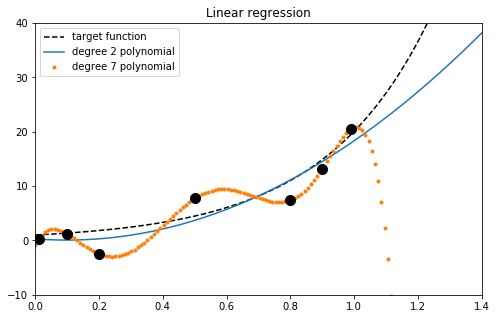

In [10]:
lrp = lm.LinearRegression()
plt.figure(figsize=(8,5))
plt.plot(x_set, y_target, '--k', label='target function');

for deg, s in zip([2, 7], ['-', '.']):
    lrp.fit(np.vander(x, deg + 1), y);
    y_lrp = lrp.predict(np.vander(x_set, deg + 1))
    plt.plot(x_set, y_lrp, s, label='degree ' + str(deg) + ' polynomial');
    plt.legend(loc=2);
    plt.xlim(0, 1.4);
    plt.ylim(-10, 40);
    print('coefficients for polynomial of degree ' + str(deg) + ': '+''.join(['%.2f,' % c for c in lrp.coef_]))
plt.plot(x, y, 'ok', ms=10);
plt.title("Linear regression");
#plt.xlim([0,4])

In the figure you can see that we have fitted two different polynomial models, one of degree 2 and the other of degree 7. The degree of a polynomial simply means the number of parameters it contains. Usually, a single parameter is used to model every single feature in the training data $X$. Thus a degree 2 polynomial models data with features $x_1$ and $x_1^2$. A degree 7 polynomial modules data with features $x_1$, $x_1^2$, $x_1^3$, $x_1^4$, $x_1^5$, $x_1^6$ and $x_1^7$. The degree 2 polynomial  (blue curve) appears to fit the training data points less precisely than the degree 7 polynomial (orange line). However, the degree 2 polynomial seems more robust (more closely matching the shape of the true target function, the dashed line). The degree 7 polynomial seems really bad at predicting values outside the training data points (look for example at the portion $x>=1.1$, for a value of $x_1$ around 1.2, the orange line would predict a **y** value of around -10, when the true value (as indicated by the dashed line) should be close to 40). This is what we call overfitting: by using a model too complex (7° of freedom), we obtain a better fit on the training dataset, but a less robust model outside this set. Note that we also printed the coefficients of each respective model. The large coefficients of the degree 7 polynomial are also a sign of overfitting.

### Ridge regularization

We will now use a different learning model, called Ridge regression. It works like linear regression, except that it prevents the polynomial's coefficients to explode (which is what happened in the overfitting example above). By adding a regularization term **$\lambda$** in the loss function $J$, Ridge regression imposes some structure on the underlying model.  

$\large{J(\theta)=\frac{1}{2m}[\sum_{i=1}^m(h_\theta(x^{(i)})-y^{(i)})^2+\lambda\sum_{j=1}^n\theta_j^2]}$

`scikit-learn` refers to the regularization term **$\lambda$**  as **$\alpha$**, But this is just a convention. In the Ridge regression model alpha $\alpha$ (**$\lambda$** in the lecture slides) represents the weight of the regularization term. In this example, I know that the right value (weight) for this parameter should be around 0.1. In situations in which we don't know the right value of  $\alpha$ (**$\lambda$**) to use, we can try different values through trial and error or use a more formal validation procedure, such as cross validation which we will study in a future lecture.

coefficients for polynomial of degree 2: 11.27,6.16,0.00,
coefficients for polynomial of degree 7: 4.02,3.11,2.22,1.58,1.62,2.87,4.69,0.00,


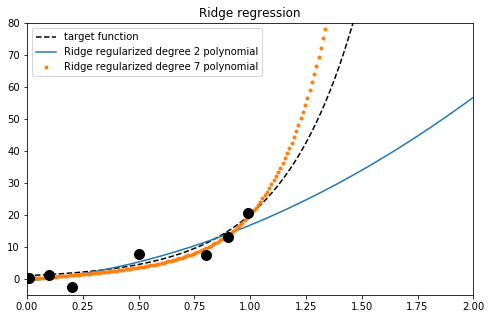

In [11]:
ridge = lm.Ridge(alpha=0.1)
plt.figure(figsize=(8,5));
plt.plot(x_set, y_target, '--k', label='target function');

for deg, s in zip([2, 7], ['-', '.']):
    ridge.fit(np.vander(x, deg + 1), y);
    y_ridge = ridge.predict(np.vander(x_set, deg + 1))
    plt.plot(x_set, y_ridge, s, label='Ridge regularized degree ' + str(deg) + ' polynomial');
    plt.legend(loc=2);
    plt.xlim(0, 2);
    plt.ylim(-5, 80);
    # Print the model's coefficients.
    print('coefficients for polynomial of degree ' + str(deg) + ': '+''.join(['%.2f,' % c for c in ridge.coef_]))

plt.plot(x, y, 'ok', ms=10);
plt.title("Ridge regression");

This time, the degree 7 polynomial seems to more precisely mimick  **$f_{target}$** (the dashed line) than the simpler degree 2 polynomial (which sort of underfits the data, aka high bias). Notice how Ridge regression has reduced the overfitting issue of the 7 degree polynomial seen before. **Observe also how the degree 7 polynomial's coefficients are much smaller than in the previous example** as a result of applying regularization. 

### Lasso regularization

We will finally use the other regularization type, Lasso, which serves a similar purpose but with an important differences.

$\large{J(\theta)=\frac{1}{2m}[\sum_{i=1}^m(h_\theta(x^{(i)})-y^{(i)})^2+\lambda\sum_{j=1}^n\theta_j]}$

coefficients for polynomial of degree 2: 17.57,0.00,0.00,
coefficients for polynomial of degree 7: 11.62,0.00,0.00,0.00,0.00,0.00,8.91,0.00,


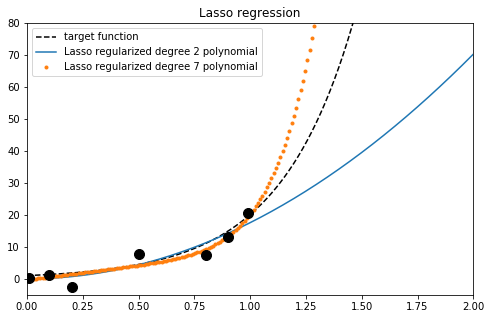

In [12]:
lasso = lm.Lasso(alpha=0.1)
plt.figure(figsize=(8,5));
plt.plot(x_set, y_target, '--k', label='target function');

for deg, s in zip([2, 7], ['-', '.']):
    lasso.fit(np.vander(x, deg + 1), y);
    y_lasso = lasso.predict(np.vander(x_set, deg + 1))
    plt.plot(x_set, y_lasso, s, label='Lasso regularized degree ' + str(deg) + ' polynomial');
    plt.legend(loc=2);
    plt.xlim(0, 2);
    plt.ylim(-5, 80);
    # Print the model's coefficients.
    print('coefficients for polynomial of degree ' + str(deg) + ': '+''.join(['%.2f,' % c for c in lasso.coef_]))
    
plt.plot(x, y, 'ok', ms=10);
plt.title("Lasso regression");

Notice how the Lasso regularization also creates a very good fit of the 7° polynomial (orange curve) to the target function (dashed curve). But it has done so in a different way to Ridge regression. Lasso regularization has bring many of the coefficients of the 7° polynomial model all the way down to 0, effectively eliminating those features from the model, and creating a model with just 2° of freedom. The important thing about Lasso regularization is that it provided us with a very interpretable model which in this case allow us to infer that the 2 features with nonzero coefficients are very important in mimicking the unknown target function. 